In [ ]:
import zipfile
import os

uploaded_file_path = "ML_dataset.zip"
extraction_dir = "ML_dataset"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")
for root, dirs, files in os.walk(extraction_dir):
    for file in files:
        print(os.path.join(root, file))


Files extracted to: ML_dataset
ML_dataset/ML_dataset/desktop.ini
ML_dataset/ML_dataset/Z/Z072.txt
ML_dataset/ML_dataset/Z/Z022.txt
ML_dataset/ML_dataset/Z/Z040.txt
ML_dataset/ML_dataset/Z/Z073.txt
ML_dataset/ML_dataset/Z/Z016.txt
ML_dataset/ML_dataset/Z/Z034.txt
ML_dataset/ML_dataset/Z/Z097.txt
ML_dataset/ML_dataset/Z/Z041.txt
ML_dataset/ML_dataset/Z/Z082.txt
ML_dataset/ML_dataset/Z/Z056.txt
ML_dataset/ML_dataset/Z/Z077.txt
ML_dataset/ML_dataset/Z/Z060.txt
ML_dataset/ML_dataset/Z/Z050.txt
ML_dataset/ML_dataset/Z/Z006.txt
ML_dataset/ML_dataset/Z/Z010.txt
ML_dataset/ML_dataset/Z/Z044.txt
ML_dataset/ML_dataset/Z/Z057.txt
ML_dataset/ML_dataset/Z/Z012.txt
ML_dataset/ML_dataset/Z/Z031.txt
ML_dataset/ML_dataset/Z/Z036.txt
ML_dataset/ML_dataset/Z/Z075.txt
ML_dataset/ML_dataset/Z/Z080.txt
ML_dataset/ML_dataset/Z/Z009.txt
ML_dataset/ML_dataset/Z/Z001.txt
ML_dataset/ML_dataset/Z/Z064.txt
ML_dataset/ML_dataset/Z/Z023.txt
ML_dataset/ML_dataset/Z/Z085.txt
ML_dataset/ML_dataset/Z/Z025.txt
ML_dataset/

In [ ]:
directories = ['S', 'Z']
labels_map = {'S': 'epileptic', 'Z': 'healthy'}

In [ ]:
!pip install scikit-learn


In [ ]:
import os
from sklearn.model_selection import train_test_split

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 'epileptic', 'Z': 'healthy'}

data = []
for directory in directories:
    dir_path = os.path.join(base_dir, directory)
    if os.path.exists(dir_path):
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if os.path.isfile(file_path):
                label = labels_map[directory]
                data.append((file_path, label))
#80% train, 20% test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=[label for _, label in data])

print(f"Total files: {len(data)}")
print(f"Training set: {len(train_data)} files")
print(f"Testing set: {len(test_data)} files")

print("\nSample Training Data:")
for path, label in train_data[:5]:
    print(f"{path} -> {label}")

print("\nSample Testing Data:")
for path, label in test_data[:5]:
    print(f"{path} -> {label}")


Total files: 200
Training set: 160 files
Testing set: 40 files

Sample Training Data:
ML_dataset/ML_dataset/S/S053.txt -> epileptic
ML_dataset/ML_dataset/Z/Z059.txt -> healthy
ML_dataset/ML_dataset/S/S049.txt -> epileptic
ML_dataset/ML_dataset/Z/Z072.txt -> healthy
ML_dataset/ML_dataset/Z/Z078.txt -> healthy

Sample Testing Data:
ML_dataset/ML_dataset/S/S014.txt -> epileptic
ML_dataset/ML_dataset/Z/Z081.txt -> healthy
ML_dataset/ML_dataset/Z/Z098.txt -> healthy
ML_dataset/ML_dataset/Z/Z058.txt -> healthy
ML_dataset/ML_dataset/S/S067.txt -> epileptic


In [ ]:

import numpy as np

# frequency 173 Hz for EEG data;
sampling_frequency = 173  #samples per second
segment_duration = 1  #in seconds
samples_per_segment = sampling_frequency * segment_duration

base_dir = "ML_dataset/ML_dataset"
output_dir = "Segmented_EEG"
os.makedirs(output_dir, exist_ok=True)

#processing each file and dividing into 1-second segments
for directory in ['S', 'Z']:
    dir_path = os.path.join(base_dir, directory)
    output_subdir = os.path.join(output_dir, directory)
    os.makedirs(output_subdir, exist_ok=True)

    if os.path.exists(dir_path):
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)

            with open(file_path, 'r') as file:
                data = np.array([float(line.strip()) for line in file])

            num_segments = len(data) // samples_per_segment
            for i in range(num_segments):
                segment = data[i * samples_per_segment:(i + 1) * samples_per_segment]

                segment_filename = f"{os.path.splitext(file_name)[0]}_segment_{i + 1}.txt"
                segment_path = os.path.join(output_subdir, segment_filename)
                np.savetxt(segment_path, segment, fmt='%.6f')

            print(f"Processed {file_path}: {num_segments} segments created.")

print(f"All segments saved to: {output_dir}")


Processed ML_dataset/ML_dataset/S/S093.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S066.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S021.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S032.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S009.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S010.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S018.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S020.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S072.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S004.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S028.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S084.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S094.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S050.txt: 23 segments created.
Processed ML_dataset/ML_dataset/S/S065.txt: 23 segments created.
Processed ML_dataset/ML_d

In [ ]:
# Median Filtering:
# A median filter with a kernel size of 15 ms is applied to smooth out the epileptic spikes.
# The kernel size in samples is calculated using the formula:
# kernel_size = (spike_duration_in_ms * sampling_frequency) / 1000
# This translates to approximately 3 samples for 15 ms at 173 Hz.

# Difference Signal:
# After applying the median filter to the segment, the difference signal is computed by
# subtracting the filtered signal from the original segment:
# difference_signal = original_segment - filtered_segment
# This step helps highlight the epileptic spikes by reducing the smooth, normal activity in the EEG.

# Saving Results:
# Both the filtered signal and difference signal are saved into separate files for each segment,
# with names like segment_1_filtered.txt and segment_1_difference.txt.





from scipy.signal import medfilt


#duration of epileptic spikes in ms and median filter length in samples
spike_duration_ms = 15
filter_length = int(spike_duration_ms * sampling_frequency / 1000)  #convert ms to samples

#filter length is odd
if filter_length % 2 == 0:
    filter_length += 1

base_dir = "ML_dataset/ML_dataset"
output_dir = "Filtered_EEG"
os.makedirs(output_dir, exist_ok=True)


def preprocess_segment(segment):
    filtered_segment = medfilt(segment, kernel_size=filter_length)
    difference_signal = segment - filtered_segment

    return filtered_segment, difference_signal

#processing each EEG segment
for directory in ['S', 'Z']:
    dir_path = os.path.join(base_dir, directory)
    output_subdir = os.path.join(output_dir, directory)
    os.makedirs(output_subdir, exist_ok=True)

    if os.path.exists(dir_path):
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)

            with open(file_path, 'r') as file:
                data = np.array([float(line.strip()) for line in file])

            num_segments = len(data) // (sampling_frequency * 1)
            for i in range(num_segments):
                segment = data[i * sampling_frequency: (i + 1) * sampling_frequency]
                filtered_segment, difference_signal = preprocess_segment(segment)
                segment_filename = f"{os.path.splitext(file_name)[0]}_segment_{i + 1}"
                filtered_segment_path = os.path.join(output_subdir, f"{segment_filename}_filtered.txt")
                np.savetxt(filtered_segment_path, filtered_segment, fmt='%.6f')
                difference_signal_path = os.path.join(output_subdir, f"{segment_filename}_difference.txt")
                np.savetxt(difference_signal_path, difference_signal, fmt='%.6f')

            print(f"Processed {file_path}: {num_segments} segments with median filtering.")

print(f"Filtered and difference signals saved to: {output_dir}")


Processed ML_dataset/ML_dataset/S/S093.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S066.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S021.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S032.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S009.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S010.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S018.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S020.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S072.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S004.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S028.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S084.txt: 23 segments with median filtering.
Processed ML_dataset/ML_dataset/S/S094.txt: 23 segme

In [ ]:
#step c

import os
import numpy as np
from scipy.signal import medfilt

sampling_frequency = 173  #Hz
spike_duration_ms = 15  #ms
kernel_size = max(3, int((spike_duration_ms * sampling_frequency) / 1000))
if kernel_size % 2 == 0:
    kernel_size += 1

def preprocess_segment(segment):
    filtered_segment = medfilt(segment, kernel_size=kernel_size)
    difference_signal = segment - filtered_segment
    return filtered_segment, difference_signal

def enhance_spikes(difference_signal, power=3):
    """
    Enhances epileptic spikes in the difference signal by raising the signal to an odd power.

    Parameters:
        difference_signal (numpy.ndarray): The difference signal obtained from preprocessing.
        power (int): The odd power to raise the signal to (default is 3).

    Returns:
        numpy.ndarray: The enhanced difference signal.
    """
    if power % 2 == 0:
        raise ValueError("Power must be an odd number to preserve the polarity of the spikes.")
    return np.sign(difference_signal) * (np.abs(difference_signal) ** power)

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
output_dir = "enhanced_segments"
os.makedirs(output_dir, exist_ok=True)

for directory in directories:
    dir_path = os.path.join(base_dir, directory)
    output_subdir = os.path.join(output_dir, directory)
    os.makedirs(output_subdir, exist_ok=True)

    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isfile(file_path):
            eeg_data = np.loadtxt(file_path)

            num_samples = sampling_frequency
            num_segments = len(eeg_data) // num_samples

            for i in range(num_segments):
                segment = eeg_data[i * num_samples:(i + 1) * num_samples]
                _, difference_signal = preprocess_segment(segment)
                #enhancing spikes
                enhanced_signal = enhance_spikes(difference_signal, power=3)
                #saving the enhanced signal to a file
                enhanced_file_name = f"{file_name.split('.')[0]}_segment_{i + 1}_enhanced.txt"
                enhanced_file_path = os.path.join(output_subdir, enhanced_file_name)
                np.savetxt(enhanced_file_path, enhanced_signal)

print("Enhanced signals have been processed and saved.")


Enhanced signals have been processed and saved.


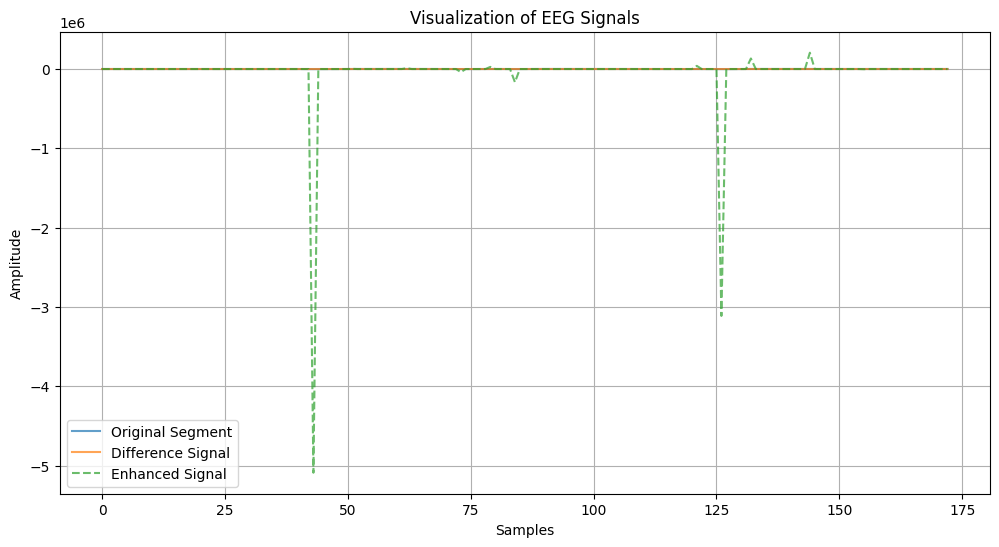

In [ ]:
#step c visualization
import matplotlib.pyplot as plt

sample_file = os.path.join(base_dir, 'S', 'S001.txt')
if os.path.isfile(sample_file):
    eeg_data = np.loadtxt(sample_file)

    num_samples = sampling_frequency
    num_segments = len(eeg_data) // num_samples
    segment = eeg_data[0:num_samples]
    _, difference_signal = preprocess_segment(segment)
    enhanced_signal = enhance_spikes(difference_signal, power=3)

    plt.figure(figsize=(12, 6))
    plt.plot(segment, label="Original Segment", alpha=0.7)
    plt.plot(difference_signal, label="Difference Signal", alpha=0.7)
    plt.plot(enhanced_signal, label="Enhanced Signal", alpha=0.7, linestyle='--')
    plt.title("Visualization of EEG Signals")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Sample file not found. Please update the path.")


In [ ]:
#step d

import os
import numpy as np

#Function to apply thresholding to enhanced spikes
def apply_threshold(enhanced_signal, threshold_ratio=0.5):
    """
    Applies thresholding to the enhanced signal based on a specified ratio of the maximum spike amplitude.

    Parameters:
        enhanced_signal (numpy.ndarray): The enhanced difference signal.
        threshold_ratio (float): The ratio of the maximum amplitude to use as the threshold (default is 0.5).

    Returns:
        numpy.ndarray: The thresholded signal.
    """
    max_amplitude = np.max(np.abs(enhanced_signal))
    threshold = threshold_ratio * max_amplitude
    return np.where(np.abs(enhanced_signal) >= threshold, enhanced_signal, 0)

input_dir = "enhanced_segments"
output_dir = "thresholded_segments"
os.makedirs(output_dir, exist_ok=True)

for root, _, files in os.walk(input_dir):
    for file_name in files:
        file_path = os.path.join(root, file_name)

        if os.path.isfile(file_path):
            enhanced_signal = np.loadtxt(file_path)
            #thresholding
            thresholded_signal = apply_threshold(enhanced_signal, threshold_ratio=0.5)
            relative_path = os.path.relpath(root, input_dir)
            output_subdir = os.path.join(output_dir, relative_path)
            os.makedirs(output_subdir, exist_ok=True)
            thresholded_file_name = f"{os.path.splitext(file_name)[0]}_thresholded.txt"
            thresholded_file_path = os.path.join(output_subdir, thresholded_file_name)
            np.savetxt(thresholded_file_path, thresholded_signal)

print("Thresholded signals have been processed and saved.")


Thresholded signals have been processed and saved.


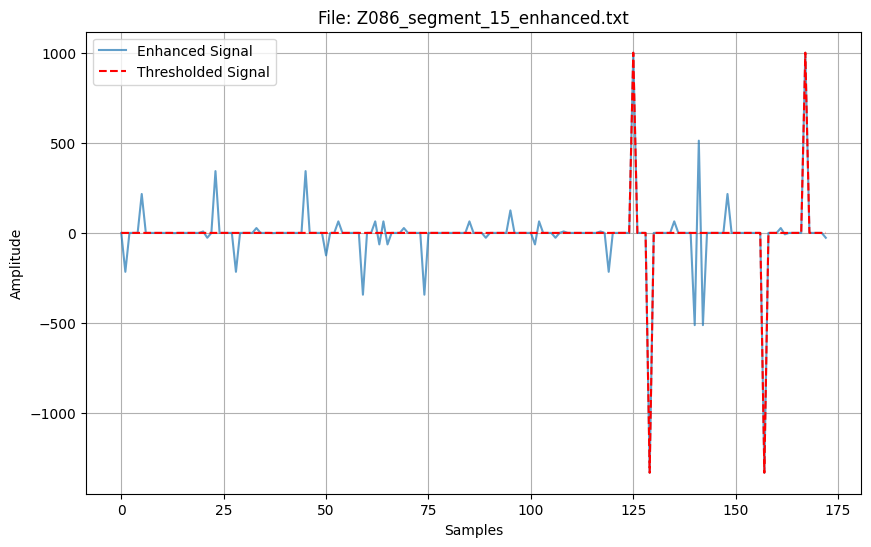

In [ ]:
#step d visualization

import os
import numpy as np
import matplotlib.pyplot as plt

def apply_threshold(enhanced_signal, threshold_ratio=0.5):
    max_amplitude = np.max(np.abs(enhanced_signal))
    threshold = threshold_ratio * max_amplitude
    return np.where(np.abs(enhanced_signal) >= threshold, enhanced_signal, 0)

def plot_thresholded_signal(original_signal, thresholded_signal, title="Thresholded EEG Segment"):
    plt.figure(figsize=(10, 6))
    plt.plot(original_signal, label="Enhanced Signal", alpha=0.7)
    plt.plot(thresholded_signal, label="Thresholded Signal", linestyle='--', color='red')
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()


input_dir = "enhanced_segments"
if not os.path.exists(input_dir):
    print(f"Input directory '{input_dir}' does not exist!")
else:
    file_found = False
    for root, _, files in os.walk(input_dir):
        for file_name in files:
            file_path = os.path.join(root, file_name)

            if os.path.isfile(file_path):
                try:
                    enhanced_signal = np.loadtxt(file_path)
                    thresholded_signal = apply_threshold(enhanced_signal, threshold_ratio=0.5)
                    plot_thresholded_signal(enhanced_signal, thresholded_signal, title=f"File: {file_name}")
                    file_found = True
                    break
                except Exception as e:
                    print(f"Error processing file '{file_path}': {e}")
        if file_found:
            break

    if not file_found:
        print("No valid files found for visualization!")


In [ ]:
#step e

import os
import numpy as np

#Function to calculate maximum spike amplitude and count the spikes
def analyze_segment(signal, threshold_ratio=0.5):
    """
    Analyze a signal to find the maximum spike amplitude and count the spikes.

    Parameters:
        signal (numpy.ndarray): The enhanced EEG signal.
        threshold_ratio (float): Ratio to determine the threshold for spike detection.

    Returns:
        float: Maximum spike amplitude in the signal.
        int: Number of spikes in the signal.
    """
    #calculating threshold
    max_amplitude = np.max(np.abs(signal))
    threshold = threshold_ratio * max_amplitude
    #identifying spikes (signal values above the threshold)
    spikes = np.abs(signal) >= threshold
    #counting the number of spikes
    num_spikes = np.sum(spikes)

    return max_amplitude, num_spikes

#input and output directories
input_dir = "thresholded_segments"  #directory containing thresholded signals
output_file = "segment_analysis.txt"

if not os.path.exists(input_dir):
    print(f"Input directory '{input_dir}' does not exist!")
else:
    results = []
    #process each segment file
    for root, _, files in os.walk(input_dir):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            if os.path.isfile(file_path):
                try:
                    #thresholded signal
                    thresholded_signal = np.loadtxt(file_path)
                    #analyzing the segment
                    max_amplitude, num_spikes = analyze_segment(thresholded_signal, threshold_ratio=0.5)
                    results.append((file_name, max_amplitude, num_spikes))

                except Exception as e:
                    print(f"Error processing file '{file_path}': {e}")

    #saving results to a file
    with open(output_file, "w") as f:
        f.write("File Name\tMax Amplitude\tNumber of Spikes\n")
        for file_name, max_amplitude, num_spikes in results:
            f.write(f"{file_name}\t{max_amplitude:.4f}\t{num_spikes}\n")

    print(f"Analysis complete. Results saved to '{output_file}'.")


Analysis complete. Results saved to 'segment_analysis.txt'.


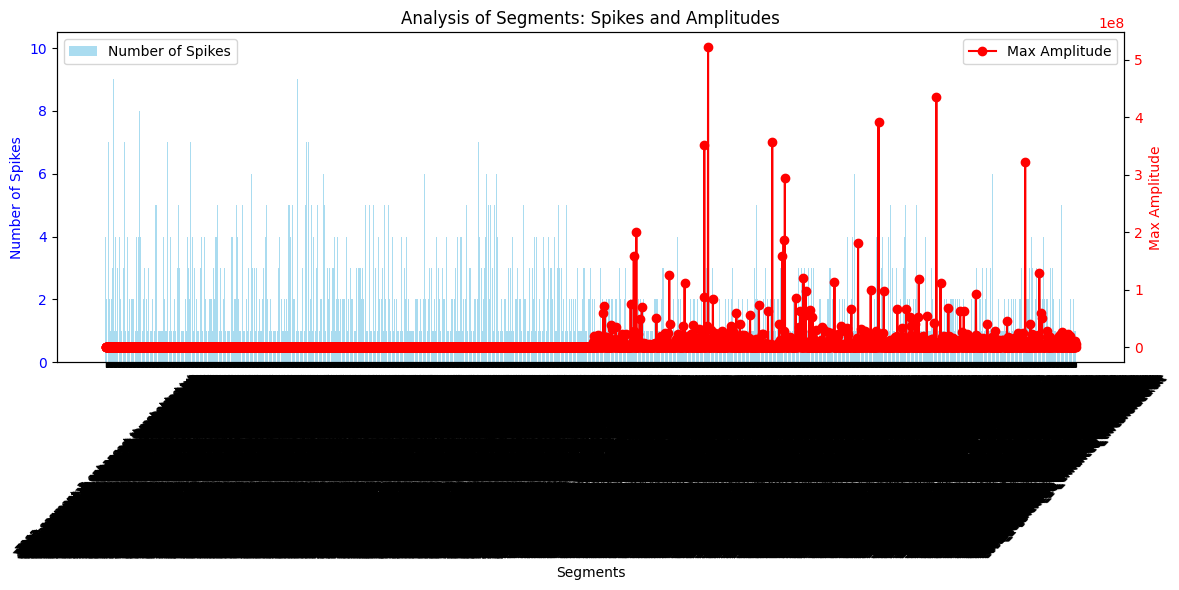

In [ ]:
#step e visualization

import os
import matplotlib.pyplot as plt

#file containing analysis results
analysis_file = "segment_analysis.txt"
if not os.path.exists(analysis_file):
    print(f"Analysis file '{analysis_file}' not found!")
else:
    segment_names = []
    max_amplitudes = []
    num_spikes = []
    with open(analysis_file, "r") as f:
        next(f)
        for line in f:
            parts = line.strip().split("\t")
            segment_name = parts[0]
            max_amplitude = float(parts[1])
            spikes = int(parts[2])
            segment_names.append(segment_name)
            max_amplitudes.append(max_amplitude)
            num_spikes.append(spikes)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    #bar chart for number of spikes
    ax1.bar(segment_names, num_spikes, color='skyblue', alpha=0.7, label='Number of Spikes')
    ax1.set_xlabel("Segments")
    ax1.set_ylabel("Number of Spikes", color='blue')
    ax1.tick_params(axis='x', rotation=45, labelsize=8)
    ax1.tick_params(axis='y', labelcolor='blue')

    #line plot for maximum spike amplitudes
    ax2 = ax1.twinx()
    ax2.plot(segment_names, max_amplitudes, color='red', marker='o', label='Max Amplitude')
    ax2.set_ylabel("Max Amplitude", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.title("Analysis of Segments: Spikes and Amplitudes")
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [ ]:
#step f

import numpy as np

#function to quantize values into 5 bits (32 levels)
def quantize(values, num_bits=5):
    """
    Quantize a list of values into the specified number of bits.

    Parameters:
        values (list or numpy.ndarray): The values to quantize.
        num_bits (int): The number of bits for quantization (default is 5).

    Returns:
        numpy.ndarray: The quantized values.
    """
    num_levels = 2 ** num_bits
    min_val = np.min(values)
    max_val = np.max(values)
    if max_val == min_val:
        return np.zeros_like(values)
    #map values to [0, num_levels - 1]
    quantized_values = np.floor((values - min_val) / (max_val - min_val) * (num_levels - 1)).astype(int)
    return quantized_values

analysis_file = "segment_analysis.txt"
quantized_output_file = "quantized_analysis.txt"
if not os.path.exists(analysis_file):
    print(f"Analysis file '{analysis_file}' not found!")
else:
    segment_names = []
    max_amplitudes = []
    num_spikes = []
    with open(analysis_file, "r") as f:
        next(f)
        for line in f:
            parts = line.strip().split("\t")
            segment_name = parts[0]
            max_amplitude = float(parts[1])
            spikes = int(parts[2])
            segment_names.append(segment_name)
            max_amplitudes.append(max_amplitude)
            num_spikes.append(spikes)
    max_amplitudes = np.array(max_amplitudes)
    num_spikes = np.array(num_spikes)
    quantized_amplitudes = quantize(max_amplitudes, num_bits=5)
    quantized_spikes = quantize(num_spikes, num_bits=5)
    with open(quantized_output_file, "w") as f:
        f.write("Segment\tQuantized Amplitude\tQuantized Spikes\n")
        for i, segment in enumerate(segment_names):
            f.write(f"{segment}\t{quantized_amplitudes[i]}\t{quantized_spikes[i]}\n")

    print(f"Quantized results saved to '{quantized_output_file}'.")


Quantized results saved to 'quantized_analysis.txt'.


Original and Quantized Data Example:
Segment Name: segment_1
Original Max Amplitude: 45.7 -> Quantized: 11
Original Spike Count: 15 -> Quantized: 0


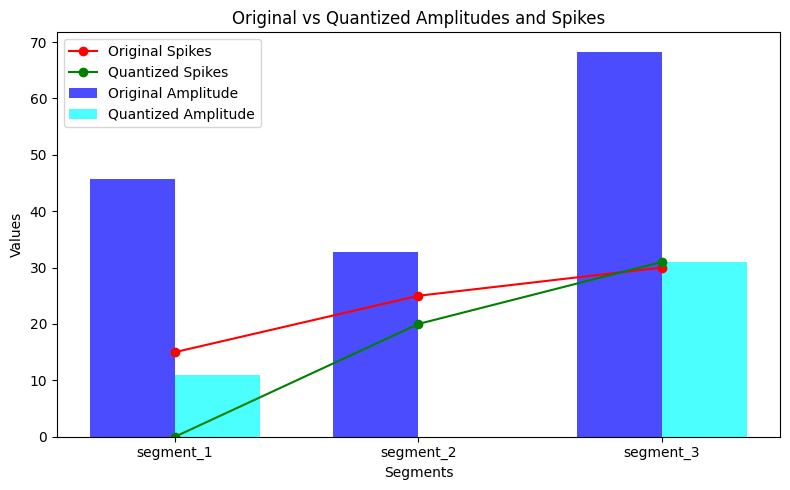

In [ ]:
#step f visualization
import numpy as np

segment_names = ["segment_1", "segment_2", "segment_3"]
max_amplitudes = [45.7, 32.8, 68.3]
num_spikes = [15, 25, 30]

def quantize(values, num_bits=5):
    num_levels = 2 ** num_bits
    min_val = np.min(values)
    max_val = np.max(values)
    if max_val == min_val:
        return np.zeros_like(values)
    quantized_values = np.floor((values - min_val) / (max_val - min_val) * (num_levels - 1)).astype(int)
    return quantized_values

quantized_amplitudes = quantize(max_amplitudes, num_bits=5)
quantized_spikes = quantize(num_spikes, num_bits=5)

print("Original and Quantized Data Example:")
print(f"Segment Name: {segment_names[0]}")
print(f"Original Max Amplitude: {max_amplitudes[0]} -> Quantized: {quantized_amplitudes[0]}")
print(f"Original Spike Count: {num_spikes[0]} -> Quantized: {quantized_spikes[0]}")

import matplotlib.pyplot as plt
x = np.arange(len(segment_names))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
#max amplitudes
ax.bar(x - width/2, max_amplitudes, width, label="Original Amplitude", color="blue", alpha=0.7)
ax.bar(x + width/2, quantized_amplitudes, width, label="Quantized Amplitude", color="cyan", alpha=0.7)
#spike counts
ax.plot(x, num_spikes, "ro-", label="Original Spikes")
ax.plot(x, quantized_spikes, "go-", label="Quantized Spikes")

ax.set_xlabel("Segments")
ax.set_ylabel("Values")
ax.set_title("Original vs Quantized Amplitudes and Spikes")
ax.set_xticks(x)
ax.set_xticklabels(segment_names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#step g
import os
import numpy as np

def quantize_to_binary(value, bits=5):
    """
    Convert an integer value to its binary representation with fixed bit length.

    Parameters:
        value (int): The integer value to convert.
        bits (int): The number of bits for the binary representation.

    Returns:
        str: Binary representation of the value as a string.
    """
    return format(value, f"0{bits}b")

input_word_file = "quantized_analysis.txt"
lamstar_input_file = "lamstar_input.txt"

if not os.path.exists(input_word_file):
    print(f"Input word file '{input_word_file}' not found!")
else:
    with open(input_word_file, "r") as f:
        lines = f.readlines()[1:]
    lamstar_words = []
    for line in lines:
        parts = line.strip().split("\t")
        segment = parts[0]
        quantized_amplitude = int(parts[1])
        quantized_spike = int(parts[2])
        rounded_amplitude = round(quantized_amplitude / 100)  # Round to nearest multiple of 100, then divide
        binary_amplitude = quantize_to_binary(rounded_amplitude, bits=5)
        binary_spike = quantize_to_binary(quantized_spike, bits=5)
        #LAMSTAR input word (2 subwords)
        lamstar_word = f"{binary_amplitude};{binary_spike}"
        lamstar_words.append((segment, lamstar_word))
    with open(lamstar_input_file, "w") as f:
        f.write("Segment\tLAMSTAR_Input_Word\n")
        for segment, word in lamstar_words:
            f.write(f"{segment}\t{word}\n")

    print(f"LAMSTAR input words saved to '{lamstar_input_file}'.")


LAMSTAR input words saved to 'lamstar_input.txt'.


In [ ]:
import pandas as pd
input_file = "lamstar_input.txt"
output_file = "lamstar_input_labeled.txt"
data = pd.read_csv(input_file, sep="\t", header=0)
if 'Segment' not in data.columns:
    raise ValueError("The input file must contain a 'Segment' column.")

#if 'Segment' starts with 'S', label as 'epileptic'; if 'Z', label as 'healthy'
data['Label'] = data['Segment'].apply(lambda x: 'epileptic' if x.startswith('S') else ('healthy' if x.startswith('Z') else 'unknown'))
data.to_csv(output_file, sep="\t", index=False)
print(f"Labeled data saved to {output_file}")


Labeled data saved to lamstar_input_labeled.txt


In [ ]:
#LAMSTAR (no denoising, no tuning)
import numpy as np
from sklearn.model_selection import train_test_split

class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_neurons, input_dim)
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)

    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])
    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        winner_index = np.argmin(distances)
        return winner_index

class LAMSTAR:
    def __init__(self, input_dim, subword_dims, num_neurons_per_som, num_output_neurons):
        self.soms = [SOM(dim, num_neurons_per_som) for dim in subword_dims]
        self.output_weights = np.random.rand(num_output_neurons, len(self.soms))
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1

    def train(self, input_data, labels, epochs=100):
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = []
                for i, som in enumerate(self.soms):
                    winner = som.get_winner(data_point[i])
                    winners.append(winner)
                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)
                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate

    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = []
            for i, som in enumerate(self.soms):
                winner = som.get_winner(data_point[i])
                winners.append(winner)

            activations = np.sum(self.output_weights[:, winners], axis=1)
            predicted_label = np.argmax(activations)
            predictions.append(predicted_label)
        return predictions

lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(int, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            #labels: 1 for epileptic (S directory), 0 for healthy (Z directory)
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)

lamstar = LAMSTAR(input_dim=2, subword_dims=[1, 1], num_neurons_per_som=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=100)
predictions = lamstar.predict(X_test)
for i, (true_label, prediction) in enumerate(zip(y_test, predictions)):
    print(f"Test Segment {i}: True Label: {'Epileptic' if true_label == 1 else 'Healthy'}, Predicted: {'Epileptic' if prediction == 1 else 'Healthy'}")

Test Segment 0: True Label: Epileptic, Predicted: Epileptic
Test Segment 1: True Label: Epileptic, Predicted: Epileptic
Test Segment 2: True Label: Epileptic, Predicted: Epileptic
Test Segment 3: True Label: Healthy, Predicted: Epileptic
Test Segment 4: True Label: Healthy, Predicted: Epileptic
Test Segment 5: True Label: Healthy, Predicted: Epileptic
Test Segment 6: True Label: Epileptic, Predicted: Epileptic
Test Segment 7: True Label: Epileptic, Predicted: Epileptic
Test Segment 8: True Label: Epileptic, Predicted: Epileptic
Test Segment 9: True Label: Epileptic, Predicted: Epileptic
Test Segment 10: True Label: Epileptic, Predicted: Epileptic
Test Segment 11: True Label: Epileptic, Predicted: Epileptic
Test Segment 12: True Label: Epileptic, Predicted: Epileptic
Test Segment 13: True Label: Healthy, Predicted: Epileptic
Test Segment 14: True Label: Healthy, Predicted: Epileptic
Test Segment 15: True Label: Healthy, Predicted: Epileptic
Test Segment 16: True Label: Healthy, Predicte

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions, target_names=["Healthy", "Epileptic"])
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.48
Confusion Matrix:
[[  0 475]
 [  0 445]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       475
   Epileptic       0.48      1.00      0.65       445

    accuracy                           0.48       920
   macro avg       0.24      0.50      0.33       920
weighted avg       0.23      0.48      0.32       920



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#LAMSTAR
import numpy as np
from sklearn.model_selection import train_test_split

class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.linspace(0, 1, num_neurons * input_dim).reshape(num_neurons, input_dim)
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)

    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])  # Normalize weights

    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        winner_index = np.argmin(distances)
        return winner_index

class LAMSTAR:
    def __init__(self, input_dim, subword_dims, num_neurons_per_som, num_output_neurons):
        self.soms = [SOM(dim, num_neurons_per_som) for dim in subword_dims]
        self.output_weights = np.random.rand(num_output_neurons, len(self.soms))
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1

    def train(self, input_data, labels, epochs=100):
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = []
                for i, som in enumerate(self.soms):
                    winner = som.get_winner(data_point[i])
                    winners.append(winner)
                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)
                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate

    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = []
            for i, som in enumerate(self.soms):
                winner = som.get_winner(data_point[i])
                winners.append(winner)

            activations = np.sum(self.output_weights[:, winners], axis=1)
            predicted_label = np.argmax(activations)
            predictions.append(predicted_label)
        return predictions

lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(int, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            #labels: 1 for epileptic (S directory), 0 for healthy (Z directory)
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)
lamstar = LAMSTAR(input_dim=2, subword_dims=[1, 1], num_neurons_per_som=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=100)
predictions = lamstar.predict(X_test)
for i, (true_label, prediction) in enumerate(zip(y_test, predictions)):
    print(f"Test Segment {i}: True Label: {'Epileptic' if true_label == 1 else 'Healthy'}, Predicted: {'Epileptic' if prediction == 1 else 'Healthy'}")

<ipython-input-29-de74327672ad>:11: RuntimeWarning: invalid value encountered in divide
  self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)


Test Segment 0: True Label: Epileptic, Predicted: Epileptic
Test Segment 1: True Label: Epileptic, Predicted: Epileptic
Test Segment 2: True Label: Epileptic, Predicted: Epileptic
Test Segment 3: True Label: Healthy, Predicted: Epileptic
Test Segment 4: True Label: Healthy, Predicted: Epileptic
Test Segment 5: True Label: Healthy, Predicted: Epileptic
Test Segment 6: True Label: Epileptic, Predicted: Epileptic
Test Segment 7: True Label: Epileptic, Predicted: Epileptic
Test Segment 8: True Label: Epileptic, Predicted: Epileptic
Test Segment 9: True Label: Epileptic, Predicted: Epileptic
Test Segment 10: True Label: Epileptic, Predicted: Epileptic
Test Segment 11: True Label: Epileptic, Predicted: Epileptic
Test Segment 12: True Label: Epileptic, Predicted: Epileptic
Test Segment 13: True Label: Healthy, Predicted: Epileptic
Test Segment 14: True Label: Healthy, Predicted: Epileptic
Test Segment 15: True Label: Healthy, Predicted: Epileptic
Test Segment 16: True Label: Healthy, Predicte

In [ ]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions, target_names=["Healthy", "Epileptic"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.48
Confusion Matrix:
[[  0 475]
 [  0 445]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       475
   Epileptic       0.48      1.00      0.65       445

    accuracy                           0.48       920
   macro avg       0.24      0.50      0.33       920
weighted avg       0.23      0.48      0.32       920



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.linspace(0, 1, num_neurons * input_dim).reshape(num_neurons, input_dim)
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)

    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])  # Normalize weights

    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        winner_index = np.argmin(distances)
        return winner_index

class LAMSTAR:
    def __init__(self, input_dim, subword_dims, num_neurons_per_som, num_output_neurons):
        self.soms = [SOM(dim, num_neurons_per_som) for dim in subword_dims]
        self.output_weights = np.random.rand(num_output_neurons, len(self.soms))
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1

    def train(self, input_data, labels, epochs=50):
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = []
                for i, som in enumerate(self.soms):
                    winner = som.get_winner(data_point[i])
                    winners.append(winner)
                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)
                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate

    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = []
            for i, som in enumerate(self.soms):
                winner = som.get_winner(data_point[i])
                winners.append(winner)

            activations = np.sum(self.output_weights[:, winners], axis=1)
            predicted_label = np.argmax(activations)
            predictions.append(predicted_label)
        return predictions

lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(int, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            #labels: 1 for epileptic (S directory), 0 for healthy (Z directory)
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)
lamstar = LAMSTAR(input_dim=2, subword_dims=[1, 1], num_neurons_per_som=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=50)
predictions = lamstar.predict(X_test)
for i, (true_label, prediction) in enumerate(zip(y_test, predictions)):
    print(f"Test Segment {i}: True Label: {'Epileptic' if true_label == 1 else 'Healthy'}, Predicted: {'Epileptic' if prediction == 1 else 'Healthy'}")

<ipython-input-34-a7384fa582f5>:11: RuntimeWarning: invalid value encountered in divide
  self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)


Test Segment 0: True Label: Epileptic, Predicted: Epileptic
Test Segment 1: True Label: Epileptic, Predicted: Epileptic
Test Segment 2: True Label: Epileptic, Predicted: Epileptic
Test Segment 3: True Label: Healthy, Predicted: Epileptic
Test Segment 4: True Label: Healthy, Predicted: Epileptic
Test Segment 5: True Label: Healthy, Predicted: Epileptic
Test Segment 6: True Label: Epileptic, Predicted: Epileptic
Test Segment 7: True Label: Epileptic, Predicted: Epileptic
Test Segment 8: True Label: Epileptic, Predicted: Epileptic
Test Segment 9: True Label: Epileptic, Predicted: Epileptic
Test Segment 10: True Label: Epileptic, Predicted: Epileptic
Test Segment 11: True Label: Epileptic, Predicted: Epileptic
Test Segment 12: True Label: Epileptic, Predicted: Epileptic
Test Segment 13: True Label: Healthy, Predicted: Epileptic
Test Segment 14: True Label: Healthy, Predicted: Epileptic
Test Segment 15: True Label: Healthy, Predicted: Epileptic
Test Segment 16: True Label: Healthy, Predicte

In [ ]:
#LAMSTAR
import numpy as np
from sklearn.model_selection import train_test_split

class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.linspace(0, 1, num_neurons * input_dim).reshape(num_neurons, input_dim)
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)

    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])  # Normalize weights

    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        winner_index = np.argmin(distances)
        return winner_index

class LAMSTAR:
    def __init__(self, input_dim, subword_dims, num_neurons_per_som, num_output_neurons):
        self.soms = [SOM(dim, num_neurons_per_som) for dim in subword_dims]
        self.output_weights = np.random.rand(num_output_neurons, len(self.soms))
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1

    def train(self, input_data, labels, epochs=2000):  #2000 epochs
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = []
                for i, som in enumerate(self.soms):
                    winner = som.get_winner(data_point[i])
                    winners.append(winner)
                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)
                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate

    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = []
            for i, som in enumerate(self.soms):
                winner = som.get_winner(data_point[i])
                winners.append(winner)

            activations = np.sum(self.output_weights[:, winners], axis=1)
            predicted_label = np.argmax(activations)
            predictions.append(predicted_label)
        return predictions

lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(int, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            #labels: 1 for epileptic (S directory), 0 for healthy (Z directory)
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)
lamstar = LAMSTAR(input_dim=2, subword_dims=[1, 1], num_neurons_per_som=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=2000)
predictions = lamstar.predict(X_test)
for i, (true_label, prediction) in enumerate(zip(y_test, predictions)):
    print(f"Test Segment {i}: True Label: {'Epileptic' if true_label == 1 else 'Healthy'}, Predicted: {'Epileptic' if prediction == 1 else 'Healthy'}")


<ipython-input-36-b4ce689ec318>:11: RuntimeWarning: invalid value encountered in divide
  self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)


Test Segment 0: True Label: Epileptic, Predicted: Epileptic
Test Segment 1: True Label: Epileptic, Predicted: Epileptic
Test Segment 2: True Label: Epileptic, Predicted: Epileptic
Test Segment 3: True Label: Healthy, Predicted: Epileptic
Test Segment 4: True Label: Healthy, Predicted: Epileptic
Test Segment 5: True Label: Healthy, Predicted: Epileptic
Test Segment 6: True Label: Epileptic, Predicted: Epileptic
Test Segment 7: True Label: Epileptic, Predicted: Epileptic
Test Segment 8: True Label: Epileptic, Predicted: Epileptic
Test Segment 9: True Label: Epileptic, Predicted: Epileptic
Test Segment 10: True Label: Epileptic, Predicted: Epileptic
Test Segment 11: True Label: Epileptic, Predicted: Epileptic
Test Segment 12: True Label: Epileptic, Predicted: Epileptic
Test Segment 13: True Label: Healthy, Predicted: Epileptic
Test Segment 14: True Label: Healthy, Predicted: Epileptic
Test Segment 15: True Label: Healthy, Predicted: Epileptic
Test Segment 16: True Label: Healthy, Predicte

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions, target_names=["Healthy", "Epileptic"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.48
Confusion Matrix:
[[  0 475]
 [  0 445]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       475
   Epileptic       0.48      1.00      0.65       445

    accuracy                           0.48       920
   macro avg       0.24      0.50      0.33       920
weighted avg       0.23      0.48      0.32       920



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.9 MB/s eta 0:00:00


In [ ]:
#LAMSTAR
import numpy as np
import pywt
from scipy.signal import medfilt
from sklearn.model_selection import train_test_split


def wavelet_denoising(signal, wavelet='db1', level=2):
    """
    Perform wavelet denoising on a 1D signal.
    :param signal: 1D numpy array of the signal
    :param wavelet: Type of wavelet to use
    :param level: Decomposition level
    :return: Denoised signal
    """
    if len(signal) < 2 ** level:
        return signal
    coeffs = pywt.wavedec(signal, wavelet, mode='symmetric', level=level)
    threshold = np.sqrt(2 * np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(denoised_coeffs, wavelet, mode='symmetric')


def median_filter(signal, kernel_size=3):
    """
    Apply median filtering to reduce noise.
    :param signal: 1D numpy array of the signal
    :param kernel_size: Kernel size for the filter
    :return: Filtered signal
    """
    if len(signal) < kernel_size:
        return signal
    return medfilt(signal, kernel_size=kernel_size)


def preprocess_data(input_data):
    """
    Preprocess the data by applying denoising techniques.
    :param input_data: 2D numpy array where each row represents a signal [subword1, subword2]
    :return: Preprocessed data
    """
    denoised_data = []
    for row in input_data:
        subword1 = np.array([row[0]])
        subword2 = np.array([row[1]])
        subword1 = wavelet_denoising(subword1)
        subword2 = wavelet_denoising(subword2)
        subword1 = median_filter(subword1) if len(subword1) >= 3 else subword1
        subword2 = median_filter(subword2) if len(subword2) >= 3 else subword2
        denoised_data.append([subword1[0] if len(subword1) > 0 else row[0],
                              subword2[0] if len(subword2) > 0 else row[1]])
    return np.array(denoised_data)


class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_neurons, input_dim)
        self.weights = self.weights / np.linalg.norm(self.weights, axis=1, keepdims=True)

    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])
    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        return np.argmin(distances)


class LAMSTAR:
    def __init__(self, input_dim, subword_dims, num_neurons_per_som, num_output_neurons):
        self.soms = [SOM(dim, num_neurons_per_som) for dim in subword_dims]
        self.output_weights = np.random.rand(num_output_neurons, len(self.soms))
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1
    def train(self, input_data, labels, epochs=2000):
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = [som.get_winner([data_point[i]]) for i, som in enumerate(self.soms)]
                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)
                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate
    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = [som.get_winner([data_point[i]]) for i, som in enumerate(self.soms)]
            activations = np.sum(self.output_weights[:, winners], axis=1)
            predictions.append(np.argmax(activations))
        return predictions


lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(float, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)

lamstar_input = preprocess_data(lamstar_input)
X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)
lamstar = LAMSTAR(input_dim=2, subword_dims=[1, 1], num_neurons_per_som=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=2000)
predictions = lamstar.predict(X_test)
for i, (true_label, prediction) in enumerate(zip(y_test, predictions)):
    print(f"Test Segment {i}: True Label: {'Epileptic' if true_label == 1 else 'Healthy'}, Predicted: {'Epileptic' if prediction == 1 else 'Healthy'}")

Test Segment 0: True Label: Epileptic, Predicted: Epileptic
Test Segment 1: True Label: Epileptic, Predicted: Epileptic
Test Segment 2: True Label: Epileptic, Predicted: Epileptic
Test Segment 3: True Label: Healthy, Predicted: Epileptic
Test Segment 4: True Label: Healthy, Predicted: Epileptic
Test Segment 5: True Label: Healthy, Predicted: Epileptic
Test Segment 6: True Label: Epileptic, Predicted: Epileptic
Test Segment 7: True Label: Epileptic, Predicted: Epileptic
Test Segment 8: True Label: Epileptic, Predicted: Epileptic
Test Segment 9: True Label: Epileptic, Predicted: Epileptic
Test Segment 10: True Label: Epileptic, Predicted: Epileptic
Test Segment 11: True Label: Epileptic, Predicted: Epileptic
Test Segment 12: True Label: Epileptic, Predicted: Epileptic
Test Segment 13: True Label: Healthy, Predicted: Epileptic
Test Segment 14: True Label: Healthy, Predicted: Epileptic
Test Segment 15: True Label: Healthy, Predicted: Epileptic
Test Segment 16: True Label: Healthy, Predicte

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions, target_names=["Healthy", "Epileptic"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.48
Confusion Matrix:
[[  0 475]
 [  0 445]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       475
   Epileptic       0.48      1.00      0.65       445

    accuracy                           0.48       920
   macro avg       0.24      0.50      0.33       920
weighted avg       0.23      0.48      0.32       920



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pywt
from scipy.signal import medfilt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
def wavelet_denoising(signal, wavelet='db1', level=2):
    if len(signal) < 2 ** level:
        return signal
    coeffs = pywt.wavedec(signal, wavelet, mode='symmetric', level=level)
    threshold = np.sqrt(2 * np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(denoised_coeffs, wavelet, mode='symmetric')

def median_filter(signal, kernel_size=3):
    if len(signal) < kernel_size:
        return signal
    return medfilt(signal, kernel_size=kernel_size)

def preprocess_data(input_data):
    """
    Preprocess the data by applying denoising techniques.
    """
    denoised_data = []
    for row in input_data:
        subword1 = np.array([row[0]])
        subword2 = np.array([row[1]])

        subword1 = wavelet_denoising(subword1)
        subword2 = wavelet_denoising(subword2)

        subword1 = median_filter(subword1) if len(subword1) >= 3 else subword1
        subword2 = median_filter(subword2) if len(subword2) >= 3 else subword2

        denoised_data.append([subword1[0] if len(subword1) > 0 else row[0],
                              subword2[0] if len(subword2) > 0 else row[1]])

    return np.array(denoised_data)


class SOM:
    def __init__(self, input_dim, num_neurons, learning_rate=0.5):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_neurons, input_dim)
        self.weights /= np.linalg.norm(self.weights, axis=1, keepdims=True)
    def train(self, input_data, epochs=100):
        for epoch in range(epochs):
            for data_point in input_data:
                distances = np.linalg.norm(self.weights - data_point, axis=1)
                winner_index = np.argmin(distances)
                self.weights[winner_index] += self.learning_rate * (data_point - self.weights[winner_index])
                self.weights[winner_index] /= np.linalg.norm(self.weights[winner_index])
    def get_winner(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        return np.argmin(distances)


class MultiLayerLAMSTAR:
    def __init__(self, input_dim, subword_dims, layers, num_neurons_per_layer, num_output_neurons):
        self.layers = [
            [SOM(dim, num_neurons_per_layer) for dim in subword_dims]
            for _ in range(layers)
        ]
        self.output_weights = np.random.rand(num_output_neurons, len(subword_dims) * layers)
        self.output_weights /= np.linalg.norm(self.output_weights, axis=1, keepdims=True)
        self.learning_rate = 0.1

    def train(self, input_data, labels, epochs=2000):
        for epoch in range(epochs):
            for data_point, label in zip(input_data, labels):
                winners = []
                for layer in self.layers:
                    for i, som in enumerate(layer):
                        winner = som.get_winner([data_point[i]])
                        winners.append(winner)

                activations = np.sum(self.output_weights[:, winners], axis=1)
                predicted_label = np.argmax(activations)

                if predicted_label == label:
                    self.output_weights[label, winners] += self.learning_rate
                else:
                    self.output_weights[label, winners] += self.learning_rate
                    self.output_weights[predicted_label, winners] -= self.learning_rate

    def predict(self, input_data):
        predictions = []
        for data_point in input_data:
            winners = []
            for layer in self.layers:
                for i, som in enumerate(layer):
                    winner = som.get_winner([data_point[i]])
                    winners.append(winner)

            activations = np.sum(self.output_weights[:, winners], axis=1)
            predictions.append(np.argmax(activations))
        return predictions



def build_and_train_nn(X_train, y_train, X_test, y_test):
    """
    Build and train a deep learning model for comparison.
    """
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_split=0.2)
    predictions = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Deep Learning Model Accuracy: {accuracy:.2f}")
    return model

lamstar_input = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            subword1, subword2 = map(float, subwords.split(';'))
            lamstar_input.append([subword1, subword2])
            labels.append(1 if "S" in segment else 0)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

lamstar_input = np.array(lamstar_input)
labels = np.array(labels)
lamstar_input = preprocess_data(lamstar_input)
X_train, X_test, y_train, y_test = train_test_split(lamstar_input, labels, test_size=0.2, random_state=42)
lamstar = MultiLayerLAMSTAR(input_dim=2, subword_dims=[1, 1], layers=2, num_neurons_per_layer=10, num_output_neurons=2)
lamstar.train(X_train, y_train, epochs=2000)
lamstar_predictions = lamstar.predict(X_test)
lamstar_accuracy = accuracy_score(y_test, lamstar_predictions)
print(f"LAMSTAR Model Accuracy: {lamstar_accuracy:.2f}")
nn_model = build_and_train_nn(X_train, y_train, X_test, y_test)

LAMSTAR Model Accuracy: 0.48


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6008 - loss: 7.6286 - val_accuracy: 0.5978 - val_loss: 0.9744
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5824 - loss: 1.3151 - val_accuracy: 0.5924 - val_loss: 1.3714
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5820 - loss: 1.3016 - val_accuracy: 0.5978 - val_loss: 0.8656
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5731 - loss: 1.6509 - val_accuracy: 0.5978 - val_loss: 1.0888
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5846 - loss: 1.1429 - val_accuracy: 0.5978 - val_loss: 0.7402
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5790 - loss: 1.6022 - val_accuracy: 0.5978 - val_loss: 0.7648
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5761 - loss: 1.1166 - val_accuracy: 0.5978 - val_loss: 0.7031
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5801 - loss: 1.4885 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model_performance(model_name, y_true, y_pred):
    """
    Evaluate and print the performance metrics for a given model.
    :param model_name: Name of the model (e.g., "LAMSTAR", "Deep Learning")
    :param y_true: Ground truth labels
    :param y_pred: Predicted labels
    """
    print(f"\nPerformance Metrics for {model_name}:")
    print("-" * 40)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

evaluate_model_performance("LAMSTAR", y_test, lamstar_predictions)
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
evaluate_model_performance("Deep Learning", y_test, nn_predictions)


Performance Metrics for LAMSTAR:
----------------------------------------
Accuracy:  0.48
Precision: 0.48
Recall:    1.00
F1 Score:  0.65

Confusion Matrix:
[[  0 475]
 [  0 445]]
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Performance Metrics for Deep Learning:
----------------------------------------
Accuracy:  0.61
Precision: 0.56
Recall:    0.88
F1 Score:  0.69

Confusion Matrix:
[[172 303]
 [ 53 392]]


In [ ]:
#RNN 50 epochs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def preprocess_lstm_data(input_data, labels):
    #convert subword sequences into numerical arrays
    sequences = []
    for row in input_data:
        subwords = [float(x) for x in row.split(';')]
        sequences.append(subwords)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(sequences), labels, label_encoder

input_data = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            input_data.append(subwords)
            labels.append(label)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

input_data, labels, label_encoder = preprocess_lstm_data(input_data, labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#LSTM model
def build_rnn(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#train the RNN model
rnn_model = build_rnn((X_train.shape[1], X_train.shape[2]))
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

y_pred = (rnn_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"RNN Model Accuracy: {accuracy:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5759 - loss: 0.6765 - val_accuracy: 0.5584 - val_loss: 0.6779
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5975 - loss: 0.6599 - val_accuracy: 0.5584 - val_loss: 0.6813
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5995 - loss: 0.6615 - val_accuracy: 0.5584 - val_loss: 0.6836
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5900 - loss: 0.6625 - val_accuracy: 0.5584 - val_loss: 0.6820
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5932 - loss: 0.6754 - val_accuracy: 0.5584 - val_loss: 0.6971
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6079 - loss: 0.6594 - val_accuracy: 0.5584 - val_loss: 0.6843
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6164 - loss: 0.6553 - val_accuracy: 0.5584 - val_loss: 0.6867
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5966 - loss: 0.6608 - val_accuracy: 0.5584 - val_

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


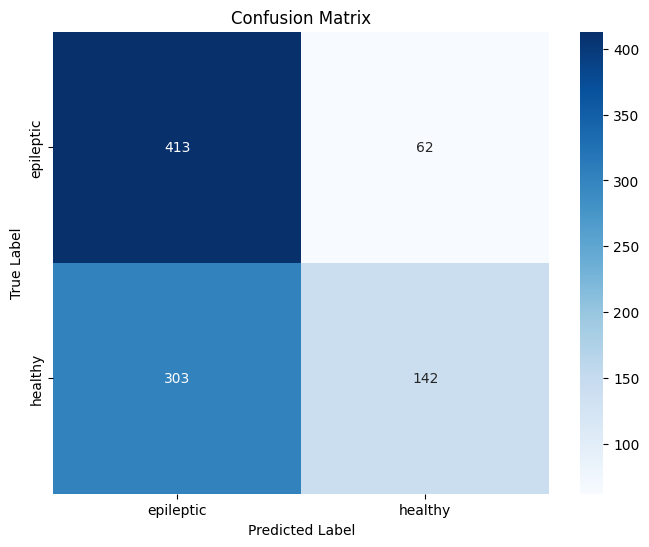

Classification Report:
              precision    recall  f1-score   support

   epileptic       0.58      0.87      0.69       475
     healthy       0.70      0.32      0.44       445

    accuracy                           0.60       920
   macro avg       0.64      0.59      0.57       920
weighted avg       0.63      0.60      0.57       920

Accuracy: 0.60


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (rnn_model.predict(X_test) > 0.5).astype(int).flatten()

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
#RNN 500 epochs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def preprocess_lstm_data(input_data, labels):
    #convert subword sequences into numerical arrays
    sequences = []
    for row in input_data:
        subwords = [float(x) for x in row.split(';')]
        sequences.append(subwords)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(sequences), labels, label_encoder

input_data = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            input_data.append(subwords)
            labels.append(label)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

input_data, labels, label_encoder = preprocess_lstm_data(input_data, labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=60)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#LSTM model
def build_rnn(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_rnn((X_train.shape[1], X_train.shape[2]))
rnn_model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=1)

y_pred = (rnn_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"RNN Model Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5356 - loss: 0.6845 - val_accuracy: 0.6114 - val_loss: 0.6595
Epoch 2/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6103 - loss: 0.6585 - val_accuracy: 0.6114 - val_loss: 0.6591
Epoch 3/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6141 - loss: 0.6580 - val_accuracy: 0.6114 - val_loss: 0.6582
Epoch 4/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5959 - loss: 0.6642 - val_accuracy: 0.6114 - val_loss: 0.6579
Epoch 5/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6073 - loss: 0.6673 - val_accuracy: 0.5910 - val_loss: 0.6587
Epoch 6/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5660 - loss: 0.6754 - val_accuracy: 0.6114 - val_loss: 0.6582
Epoch 7/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5965 - loss: 0.6615 - val_accuracy: 0.6114 - val_loss: 0.6597
Epoch 8/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6013 - loss: 0.6634 - val_ac

In [ ]:
#RNN 5000 epochs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

def preprocess_lstm_data(input_data, labels):
    sequences = []
    for row in input_data:
        subwords = [float(x) for x in row.split(';')]
        sequences.append(subwords)

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(sequences), labels, label_encoder

input_data = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            input_data.append(subwords)
            labels.append(label)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

input_data, labels, label_encoder = preprocess_lstm_data(input_data, labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=60)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#LSTM model
def build_rnn(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_rnn((X_train.shape[1], X_train.shape[2]))
rnn_model.fit(X_train, y_train, epochs=5000, batch_size=16, validation_split=0.2, verbose=1)

y_pred = (rnn_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"RNN Model Accuracy: {accuracy:.2f}")

Epoch 1/5000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5614 - loss: 0.6876 - val_accuracy: 0.6114 - val_loss: 0.6588
Epoch 2/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5917 - loss: 0.6691 - val_accuracy: 0.5910 - val_loss: 0.6614
Epoch 3/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5963 - loss: 0.6630 - val_accuracy: 0.5910 - val_loss: 0.6587
Epoch 4/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6050 - loss: 0.6661 - val_accuracy: 0.6114 - val_loss: 0.6619
Epoch 5/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5994 - loss: 0.6669 - val_accuracy: 0.6114 - val_loss: 0.6584
Epoch 6/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6048 - loss: 0.6583 - val_accuracy: 0.5910 - val_loss: 0.6597
Epoch 7/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6179 - loss: 0.6595 - val_accuracy: 0.6114 - val_loss: 0.6731
Epoch 8/5000
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5907 - loss: 0.6735 - val_accuracy:

KeyboardInterrupt: 

In [2]:
#CNN 30 epochs
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_cnn_data(input_data, labels):
    sequences = []
    for row in input_data:
        try:
            subwords = [float(x) for x in row.split(';') if x.strip()]
            sequences.append(subwords)
        except ValueError:
            print(f"Skipping invalid sequence: {row}")

    #ensure consistent sequence length by padding
    max_len = max(len(seq) for seq in sequences) if sequences else 0
    if max_len == 0:
        raise ValueError("All sequences are empty. Check input data formatting.")
    sequences = [seq + [0] * (max_len - len(seq)) for seq in sequences]

    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(sequences), labels, label_encoder

input_data = []
labels = []

with open('lamstar_input_labeled.txt', 'r') as file:
    next(file)
    for line in file:
        try:
            segment, subwords, label = line.strip().split('\t')
            input_data.append(subwords)
            labels.append(label)
        except ValueError:
            print(f"Invalid line skipped: {line.strip()}")

input_data, labels, label_encoder = preprocess_cnn_data(input_data, labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, labels, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(16, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn((X_train.shape[1], X_train.shape[2]))
cnn_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

y_pred = (cnn_model.predict(X_test) > 0.5).astype(int).flatten()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: 'lamstar_input_labeled.txt'

In [ ]:
#CNN 50 epochs
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_data(file_path):
    input_data = []
    labels = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            try:
                segment, subwords, label = line.strip().split('\t')
                subword1, subword2 = map(float, subwords.split(';'))
                input_data.append([subword1, subword2])
                labels.append(label)
            except ValueError:
                print(f"Invalid line skipped: {line.strip()}")
    return np.array(input_data), np.array(labels)

file_path = 'lamstar_input_labeled.txt'
input_data, labels = load_data(file_path)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

X_train, X_test, y_train, y_test = train_test_split(
    input_data, categorical_labels, test_size=0.2, random_state=60
)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#CNN model
def build_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=1, activation='relu')(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cnn_model = build_cnn(X_train.shape[1:], num_classes=categorical_labels.shape[1])
cnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Model Accuracy: {accuracy:.2f}")

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5565 - loss: 13.2274 - val_accuracy: 0.5829 - val_loss: 3.6360
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5956 - loss: 5.7707 - val_accuracy: 0.5829 - val_loss: 4.0917
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5627 - loss: 5.0714 - val_accuracy: 0.5829 - val_loss: 1.3610
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5700 - loss: 1.6350 - val_accuracy: 0.5829 - val_loss: 1.0800
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5950 - loss: 0.8269 - val_accuracy: 0.5489 - val_loss: 0.6841
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5711 - loss: 0.6705 - val_accuracy: 0.5489 - val_loss: 0.6832
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5693 - loss: 0.6738 - val_accuracy: 0.5829 - val_loss: 0.6769
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5753 - loss: 0.6585 - val_accuracy: 0

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Model Accuracy: {accuracy:.2f}")

y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)

CNN Model Accuracy: 0.62
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Confusion Matrix:
[[261 184]
 [169 306]]

Classification Report:
              precision    recall  f1-score   support

   epileptic       0.61      0.59      0.60       445
     healthy       0.62      0.64      0.63       475

    accuracy                           0.62       920
   macro avg       0.62      0.62      0.62       920
weighted avg       0.62      0.62      0.62       920



In [ ]:
#CNN 500 epochs

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def load_data(file_path):
    input_data = []
    labels = []
    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            try:
                segment, subwords, label = line.strip().split('\t')
                subword1, subword2 = map(float, subwords.split(';'))
                input_data.append([subword1, subword2])
                labels.append(label)
            except ValueError:
                print(f"Invalid line skipped: {line.strip()}")
    return np.array(input_data), np.array(labels)

file_path = 'lamstar_input_labeled.txt'
input_data, labels = load_data(file_path)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

X_train, X_test, y_train, y_test = train_test_split(
    input_data, categorical_labels, test_size=0.2, random_state=42
)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

def build_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=1, activation='relu')(inputs)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cnn_model = build_cnn(X_train.shape[1:], num_classes=categorical_labels.shape[1])
cnn_model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Model Accuracy: {accuracy:.2f}")

y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)

Epoch 1/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5018 - loss: 30.7444 - val_accuracy: 0.5924 - val_loss: 2.5560
Epoch 2/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5826 - loss: 7.8859 - val_accuracy: 0.5978 - val_loss: 1.8893
Epoch 3/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5770 - loss: 6.5093 - val_accuracy: 0.5978 - val_loss: 2.0265
Epoch 4/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5861 - loss: 4.9560 - val_accuracy: 0.5978 - val_loss: 1.0774
Epoch 5/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5929 - loss: 1.8692 - val_accuracy: 0.5978 - val_loss: 0.7831
Epoch 6/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5868 - loss: 1.2166 - val_accuracy: 0.5978 - val_loss: 0.7187
Epoch 7/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5756 - loss: 0.8092 - val_accuracy: 0.5842 - val_loss: 0.6607
Epoch 8/500
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5529 - loss: 0.6840 - val_acc

In [1]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nClassification Report:")
print(class_report)
overall_accuracy = accuracy
print(f"\nAccuracy: {overall_accuracy:.2f}")

NameError: name 'plt' is not defined